In [1]:
# Import Libraries
#Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
from numpy import median, mean ,sum

#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Read the csv file with utf-8 decoding
dfcolraw = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/Colonoscopyrecords.csv')
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


In [3]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             41391 non-null  int64 
 1   Age            41391 non-null  int64 
 2   proceduredate  41391 non-null  object
 3   Gender         41391 non-null  object
 4   CLINICID       41391 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [4]:
dfcolraw.shape

(41391, 5)

In [5]:
dfcolavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()


In [6]:
dfcolavg=pd.DataFrame(dfcolavg)

In [7]:
dfcolavg

ID
Age proceduredate    
53  25/07/2018      1
57  29/04/2015      1
58  07/02/2018      1
59  02/03/2017      1
    09/07/2018      1
...                ..
79  29/01/2023      2
80  02/03/2023      1
    12/07/2023      1
    14/12/2022      1
    15/05/2023      1

[21268 rows x 1 columns]

In [8]:
dfcolage=dfcolraw.groupby(['Age'])['ID'].agg(["count"])

In [9]:
dfcolage.shape

(25, 1)

In [10]:
dfcolage.describe()

,count
count,25.000000
mean,1655.640000
std,1684.220168
min,1.000000
25%,62.000000
50%,927.000000
75%,3160.000000
max,4915.000000


In [11]:
dfcolage=pd.DataFrame(dfcolage).reset_index()

In [12]:
dfcolage

,Age,count
0,53,1
1,57,1
2,58,1
3,59,4
4,60,3160
5,61,1716
6,62,2571
7,63,3281
8,64,3121
9,65,3386


In [13]:
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


In [14]:
dfcolraw['proceduredate']=pd.to_datetime(dfcolraw['proceduredate'])
dfcolraw['proceduredate'] =pd.to_datetime(dfcolraw['proceduredate'].dt.strftime('%d/%m/%Y'))


In [15]:
#Create a new column in dataframe that has the value of date and month combination
dfcolraw['day'] = [x.day for x in dfcolraw['proceduredate']]
dfcolraw['month'] = [x.month for x in dfcolraw['proceduredate']]
dfcolraw['year'] = [x.year for x in dfcolraw['proceduredate']]

# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year
0,1,69,2013-03-19,M,19,19,3,2013
1,2,69,2013-03-12,F,19,12,3,2013
2,3,69,2013-03-05,F,19,5,3,2013
3,4,69,2013-03-12,M,19,12,3,2013
4,5,69,2013-03-12,M,19,12,3,2013


In [16]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolraw['Monthname'] = dfcolraw['month'].map(monthsmap)
# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar


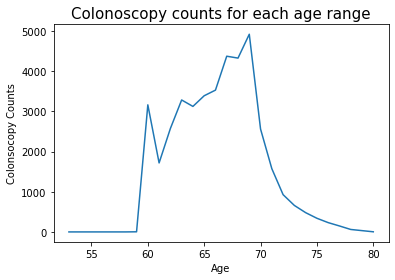

In [17]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = dfcolage['Age']
y = dfcolage['count']

plt.plot(x, y) # Plot the chart
plt.xlabel('Age')
plt.ylabel('Colonsocopy Counts')
plt.title('Colonoscopy counts for each age range', fontsize=15)

plt.show() # display

In [18]:
#Create dataframe for each date
dfcoldate=dfcolraw.groupby(['proceduredate'])['ID'].agg(["count"]).reset_index()

In [19]:
dfcoldate

,proceduredate,count
0,2012-12-03,1
1,2013-02-20,3
2,2013-02-25,1
3,2013-03-01,3
4,2013-03-04,3
...,...,...
2693,2023-07-06,28
2694,2023-07-07,9
2695,2023-07-10,23
2696,2023-07-11,14


In [20]:
#Create dataframe for each Unit
dfcolclinic=dfcolraw.groupby(['CLINICID','Age'])['ID'].agg(["count"]).reset_index()

In [21]:
dfcolclinic

,CLINICID,Age,count
0,1,60,477
1,1,61,226
2,1,62,285
3,1,63,512
4,1,64,400
...,...,...,...
319,24,76,11
320,24,77,9
321,24,78,1
322,24,79,5


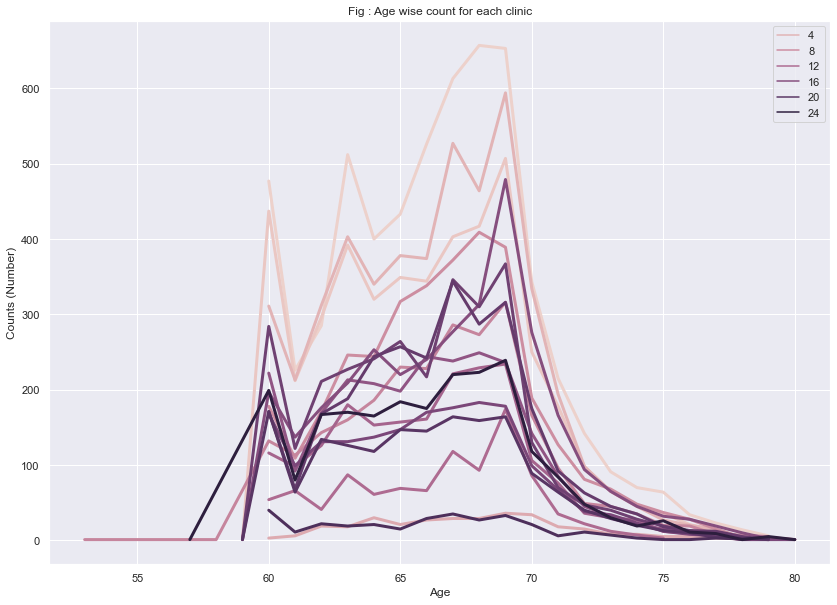

In [22]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolclinic, x ='Age', y = 'count',
                  hue='CLINICID', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

Text(0.5, 1.0, 'Box plot Administration')

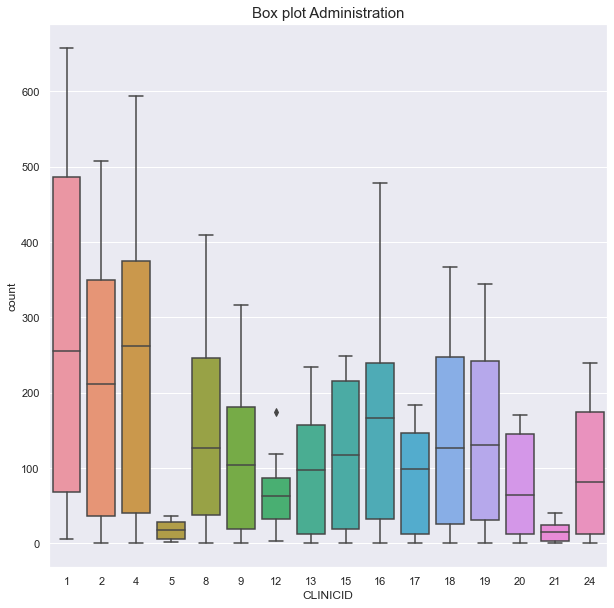

In [23]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

In [24]:
#Create dataframe for each Unit
dfcolclinicpd=dfcolraw.groupby(['CLINICID','Age','proceduredate','Gender'])['ID'].agg(["count"]).reset_index()
dfcolclinicpd

,CLINICID,Age,proceduredate,Gender,count
0,1,60,2016-06-21,M,1
1,1,60,2016-07-12,M,1
2,1,60,2016-07-26,M,1
3,1,60,2016-08-09,M,1
4,1,60,2016-08-16,M,1
...,...,...,...,...,...
38000,24,79,2023-02-11,F,1
38001,24,79,2023-02-11,M,1
38002,24,79,2023-06-14,M,1
38003,24,79,2023-06-28,F,1


In [25]:
dfcolclinicpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CLINICID       38005 non-null  int64         
 1   Age            38005 non-null  int64         
 2   proceduredate  38005 non-null  datetime64[ns]
 3   Gender         38005 non-null  object        
 4   count          38005 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [26]:
dfcolclinicpd['proceduredate']=pd.to_datetime(dfcolclinicpd['proceduredate'])
dfcolclinicpd['proceduredate'] =pd.to_datetime(dfcolclinicpd['proceduredate'].dt.strftime('%d/%m/%Y'))


In [27]:
#Create a new column in dataframe that has the value of date and month combination
dfcolclinicpd['day'] = [x.day for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['month'] = [x.month for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['year'] = [x.year for x in dfcolclinicpd['proceduredate']]

# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year
0,1,60,2016-06-21,M,1,21,6,2016
1,1,60,2016-12-07,M,1,7,12,2016
2,1,60,2016-07-26,M,1,26,7,2016
3,1,60,2016-09-08,M,1,8,9,2016
4,1,60,2016-08-16,M,1,16,8,2016


In [28]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolclinicpd['Monthname'] = dfcolclinicpd['month'].map(monthsmap)
# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


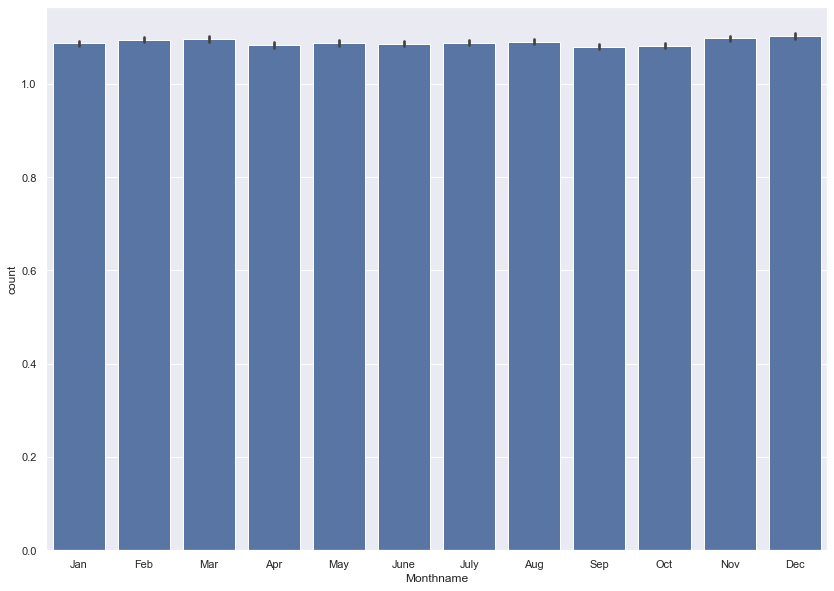

In [29]:
ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

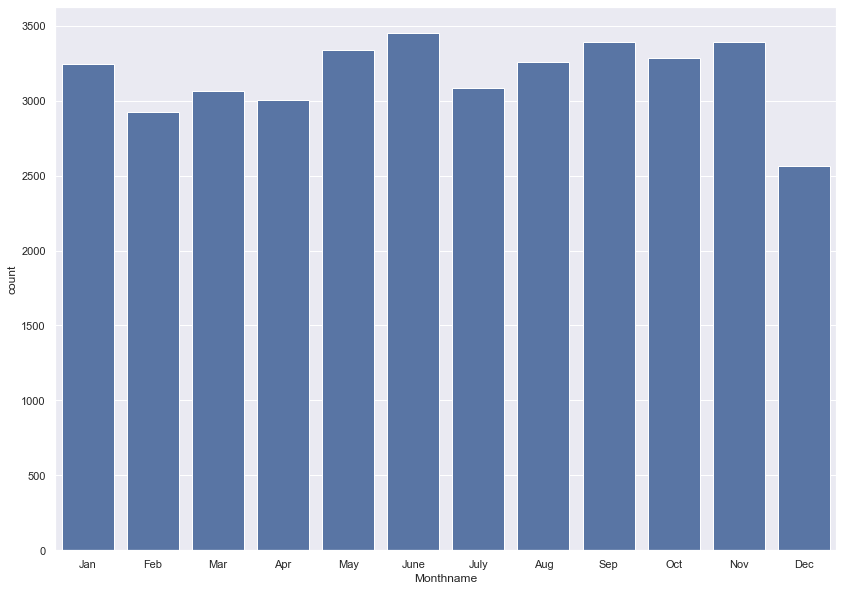

In [30]:
ax = sns.countplot(x="Monthname", data=dfcolclinicpd,  order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [31]:
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


<AxesSubplot:xlabel='Gender', ylabel='count'>

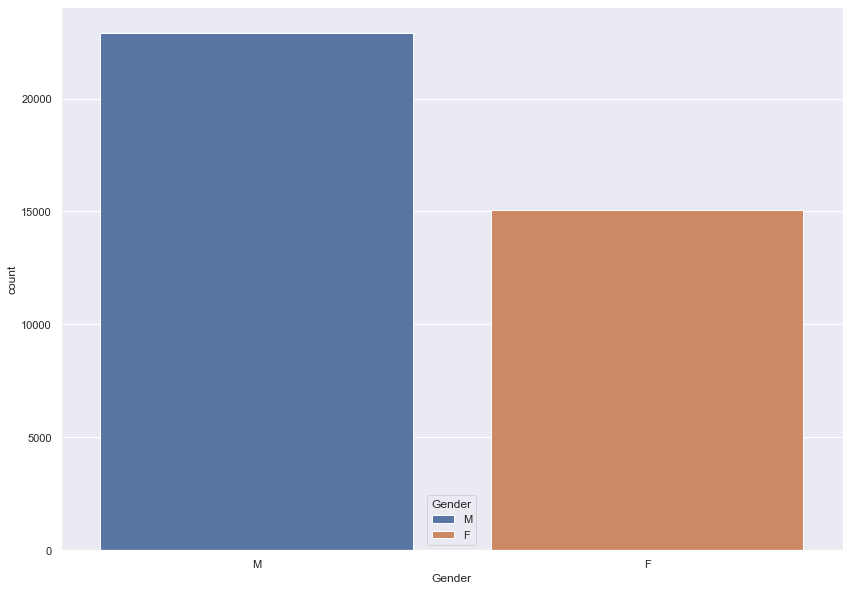

In [32]:
sns.countplot(x='Gender',hue='Gender',data=dfcolclinicpd,dodge=False)


In [33]:
y=dfcolclinicpd.groupby(['Gender'])['Gender'].count()
y

Gender
F    15086
M    22919
Name: Gender, dtype: int64

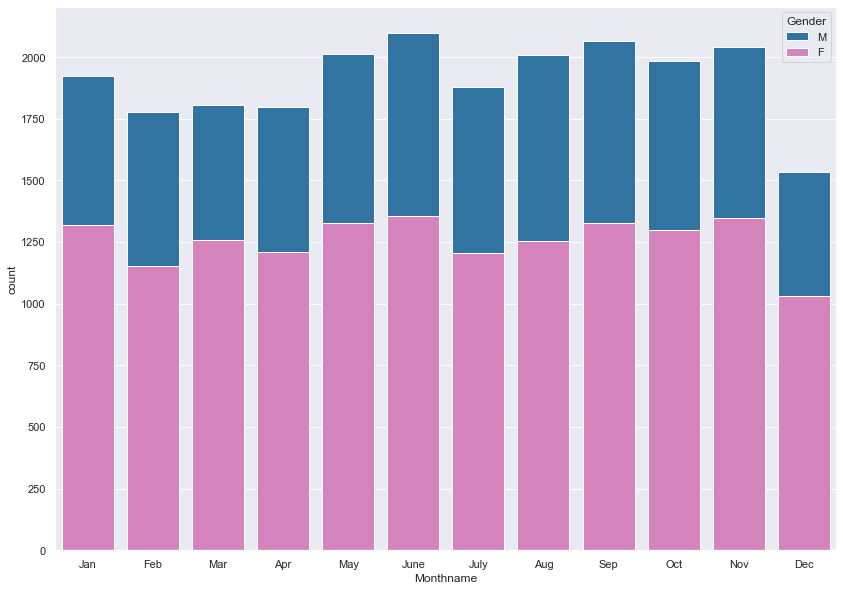

In [34]:
palette = {
    'M': 'tab:blue',
    'F': 'tab:pink',
}
ax= sns.countplot(x='Monthname',hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],data=dfcolclinicpd,dodge=False)

#ax = sns.barplot(x="Monthname", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [35]:
#ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar
...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,30,6,2023,June
41387,41388,62,2023-07-12,F,18,12,7,2023,July
41388,41389,62,2023-07-12,M,13,12,7,2023,July
41389,41390,80,2023-07-12,M,13,12,7,2023,July


In [36]:

dfcolgenageyearaggregate=dfcolraw.groupby(['Gender','Age','year'])['ID'].count().reset_index()
dfcolgenageyearaggregate.tail()

,Gender,Age,year,ID
350,M,78,2022,20
351,M,78,2023,9
352,M,79,2022,10
353,M,79,2023,15
354,M,80,2023,3


In [37]:
dfcolraw.groupby(['year'])['ID'].count()

year
2012       1
2013    1420
2014    3352
2015    4014
2016    4004
2017    4353
2018    4378
2019    4457
2020    3154
2021    4236
2022    4816
2023    3206
Name: ID, dtype: int64

In [38]:
## Using pivot function, specify the index, columns, and the values. The purpose here is to replace the NaN values, logically for each country and animal type
dflspivot= dfcolgenageyearaggregate.pivot (index=['Gender','Age'],columns='year',values='ID').reset_index()
dflspivot.head()


year,Gender,Age,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,F,57,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,F,60,NaN,NaN,2.0,1.0,105.0,278.0,243.0,217.0,84.0,129.0,185.0,113.0
3,F,61,NaN,NaN,2.0,3.0,238.0,101.0,52.0,33.0,29.0,43.0,99.0,56.0
4,F,62,NaN,NaN,14.0,51.0,149.0,96.0,137.0,228.0,85.0,93.0,95.0,127.0


In [39]:
print( dflspivot.columns) # for columns
print(dflspivot.index) # for row indexes

Index(['Gender',    'Age',     2012,     2013,     2014,     2015,     2016,
           2017,     2018,     2019,     2020,     2021,     2022,     2023],
      dtype='object', name='year')
RangeIndex(start=0, stop=47, step=1)


In [40]:
#Delete the 2012, 2013 and 2023 data since they are not complete and  might result in incorrect prediction
dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
dflspivot = dflspivot.drop(dflspivot.columns[[11]],axis=1)
dflspivot

year,Gender,Age,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,84.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,29.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,85.0,93.0,95.0
5,F,63,20.0,222.0,256.0,91.0,196.0,152.0,60.0,128.0,178.0
6,F,64,63.0,163.0,126.0,83.0,135.0,121.0,78.0,152.0,160.0
7,F,65,85.0,175.0,105.0,154.0,209.0,126.0,90.0,174.0,123.0
8,F,66,153.0,223.0,105.0,159.0,152.0,110.0,100.0,141.0,146.0
9,F,67,206.0,265.0,96.0,166.0,143.0,158.0,131.0,156.0,190.0


In [41]:
#There are more NULL values, these are the cases where for a country for all the years there is nothing submitted, we will mark such NaN as 0.

dflspivot.sort_values(by='Age', inplace=True) 

colnames=dflspivot.columns.values
for i in colnames:
    dflspivot[i] = dflspivot[i].replace(np.nan, 0)

In [42]:
dflspivot.reset_index()

year,index,Gender,Age,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,26,M,60,1.0,0.0,169.0,374.0,303.0,279.0,135.0,168.0,252.0
6,2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,84.0,129.0,185.0
7,3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,29.0,43.0,99.0
8,27,M,61,3.0,7.0,366.0,160.0,113.0,64.0,47.0,73.0,149.0
9,28,M,62,10.0,75.0,216.0,141.0,137.0,313.0,128.0,137.0,150.0


In [43]:
print (dflspivot.columns.tolist())

['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [44]:
dflspivot=dflspivot[['Gender','Age',2014,2015,2016,2017,2018,2019,2020,2021,2022]]
dflspivot.head()

year,Gender,Age,2014,2015,2016,2017,2018,2019,2020,2021,2022
23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [45]:
dflspivotgt60=dflspivot[['Gender','Age',2016,2017,2018,2019,2020,2021,2022]].loc[dflspivot['Age']>=60]
dflspivotlt69=dflspivotgt60[['Gender','Age',2016,2017,2018,2019,2020,2021,2022]].loc[dflspivotgt60['Age']<=69]
dflspivotlt69.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 26 to 35
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  20 non-null     object 
 1   Age     20 non-null     int64  
 2   2016    20 non-null     float64
 3   2017    20 non-null     float64
 4   2018    20 non-null     float64
 5   2019    20 non-null     float64
 6   2020    20 non-null     float64
 7   2021    20 non-null     float64
 8   2022    20 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.6+ KB


In [46]:
dflspivotlt69['mean'] = dflspivotlt69.iloc[:, 2:8].mean(axis=1)
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2020,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,135.0,168.0,252.0,238.000000
2,F,60,105.0,278.0,243.0,217.0,84.0,129.0,185.0,176.000000
3,F,61,238.0,101.0,52.0,33.0,29.0,43.0,99.0,82.666667
27,M,61,366.0,160.0,113.0,64.0,47.0,73.0,149.0,137.166667
28,M,62,216.0,141.0,137.0,313.0,128.0,137.0,150.0,178.666667
4,F,62,149.0,96.0,137.0,228.0,85.0,93.0,95.0,131.333333
29,M,63,352.0,144.0,263.0,191.0,116.0,170.0,208.0,206.000000
5,F,63,256.0,91.0,196.0,152.0,60.0,128.0,178.0,147.166667
30,M,64,198.0,119.0,232.0,181.0,107.0,278.0,230.0,185.833333
6,F,64,126.0,83.0,135.0,121.0,78.0,152.0,160.0,115.833333


In [47]:
dfcolmean=dflspivotlt69[['Gender','Age','mean']]
dfcolmean

year,Gender,Age,mean
26,M,60,238.000000
2,F,60,176.000000
3,F,61,82.666667
27,M,61,137.166667
28,M,62,178.666667
4,F,62,131.333333
29,M,63,206.000000
5,F,63,147.166667
30,M,64,185.833333
6,F,64,115.833333


In [48]:
#Import Census Data

#Read the csv file with utf-8 decoding
dfcensusm = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Male_Msc.csv')
dfcensusf = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Female_Msc.csv')



dfcensusm.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611


In [49]:
dfcensusm['meanE'] = dfcensusm.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusm.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650,39711.833333
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050,39209.833333
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926,38485.166667
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356,37623.166667
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611,37185.666667


In [50]:
dfcensusf['meanE'] = dfcensusf.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusf.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,F,43143,43696,43337,41408,39379,38506,38127,37471,37145,37081,41578.166667
1,41,F,43696,43337,41408,39379,38506,38127,37471,37145,37081,36199,40742.166667
2,42,F,43337,41408,39379,38506,38127,37471,37145,37081,36199,35025,39704.666667
3,43,F,41408,39379,38506,38127,37471,37145,37081,36199,35025,34414,38672.666667
4,44,F,39379,38506,38127,37471,37145,37081,36199,35025,34414,32204,37951.500000


In [51]:
#Data frame to only take mean
dfcensusmmean=dfcensusm[['Age','Gender','meanE']]
dfcensusfmean=dfcensusf[['Age','Gender','meanE']]

In [52]:
#Let us take mean data for the eligible population in census
dfcensusmmean=dfcensusmmean.loc[dfcensusm['Age']>=60]
dfcensusmmean

,Age,Gender,meanE
20,60,M,26555.166667
21,61,M,25772.500000
22,62,M,25068.833333
23,63,M,24299.833333
24,64,M,23751.500000
25,65,M,23105.833333
26,66,M,22364.000000
27,67,M,21731.666667
28,68,M,20980.666667
29,69,M,20312.500000


In [53]:
#dfcensusmmean=dfcensusmmean.loc[dfcensusm2019['Age']<70]


In [54]:
#Let us take 2019 data which is most reliable since it is latest year pre-covid and expect same tendency to continue from 2024 if the age range is untouched.
dfcensusf2019=dfcensusf[['Age','Gender','2019E']].loc[dfcensusf['Age']>=60]
dfcensusf2019=dfcensusf2019[['Age','Gender','2019E']].loc[dfcensusf2019['Age']<70]
dfcensusf2019

,Age,Gender,2019E
20,60,F,26312
21,61,F,26109
22,62,F,25183
23,63,F,24662
24,64,F,24524
25,65,F,23018
26,66,F,23375
27,67,F,21897
28,68,F,21236
29,69,F,21159


In [55]:
dfcensusmean = [dfcensusmmean, dfcensusfmean]

In [56]:
dfcensusmean=pd.concat(dfcensusmean)


In [57]:
dfcensusmean.reset_index(drop=True)


,Age,Gender,meanE
0,60,M,26555.166667
1,61,M,25772.500000
2,62,M,25068.833333
3,63,M,24299.833333
4,64,M,23751.500000
...,...,...,...
77,86,F,4906.666667
78,87,F,3656.500000
79,88,F,2528.833333
80,89,F,1541.000000


In [58]:
dfcolmean

year,Gender,Age,mean
26,M,60,238.000000
2,F,60,176.000000
3,F,61,82.666667
27,M,61,137.166667
28,M,62,178.666667
4,F,62,131.333333
29,M,63,206.000000
5,F,63,147.166667
30,M,64,185.833333
6,F,64,115.833333


In [59]:
print( dfcolmean.columns) # for columns
#print(dfcolmean.index) # for row indexes

Index(['Gender', 'Age', 'mean'], dtype='object', name='year')


In [60]:
dfcolmean = dfcolmean.rename_axis(columns=None)
dfcolmean.reset_index(drop=True)

,Gender,Age,mean
0,M,60,238.000000
1,F,60,176.000000
2,F,61,82.666667
3,M,61,137.166667
4,M,62,178.666667
5,F,62,131.333333
6,M,63,206.000000
7,F,63,147.166667
8,M,64,185.833333
9,F,64,115.833333


In [61]:
dfcolmean.reset_index(inplace=True, drop=True)
dfcensusmean.reset_index(inplace=True, drop=True)

In [62]:
result = pd.merge(dfcolmean, dfcensusmean, on=["Age", "Gender"])

In [63]:
result['percent']=result['mean']*100/result['meanE']

In [64]:
result

,Gender,Age,mean,meanE,percent
0,M,60,238.000000,26555.166667,0.896247
1,F,60,176.000000,27237.000000,0.646180
2,F,61,82.666667,26503.500000,0.311908
3,M,61,137.166667,25772.500000,0.532221
4,M,62,178.666667,25068.833333,0.712704
5,F,62,131.333333,25781.500000,0.509409
6,M,63,206.000000,24299.833333,0.847742
7,F,63,147.166667,24968.000000,0.589421
8,M,64,185.833333,23751.500000,0.782407
9,F,64,115.833333,24478.500000,0.473204


In [65]:
result.groupby(['Gender']).mean()


,Age,mean,meanE,percent
Gender,,,,
F,64.5,136.316667,24136.466667,0.570028
M,64.5,209.183333,23394.250000,0.908012


In [66]:
#Data frame to only take mean
dfcensusmall=dfcensusm[['Age','Gender','meanE']]
dfcensusfall=dfcensusf[['Age','Gender','meanE']]

In [67]:
conact1 = [dfcensusmall, dfcensusfall]
dfcensusall=pd.concat(conact1)
dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]



In [84]:

import numpy as np

dfcensus5569['Projectedcol'] = np.where(dfcensus5569['Gender']=='M', dfcensus5569['meanE']*0.91/100, dfcensus5569['meanE']*0.57/100)

dfcensus5569.reset_index(drop=True,inplace=True)
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,273.536900
1,56,M,29475.000000,268.222500
2,57,M,28880.333333,262.811033
3,58,M,28045.833333,255.217083
4,59,M,27271.166667,248.167617
5,60,M,26555.166667,241.652017
6,61,M,25772.500000,234.529750
7,62,M,25068.833333,228.126383
8,63,M,24299.833333,221.128483
9,64,M,23751.500000,216.138650


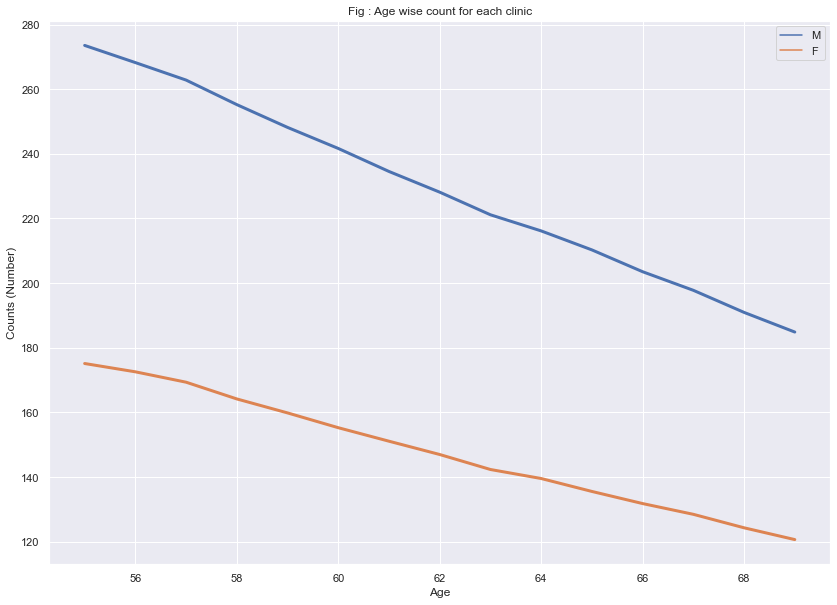

In [69]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcensus5569, x ='Age', y = 'Projectedcol',
                  hue='Gender', lw=3) # Draw the plot
plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot


In [70]:
# Next step use seperate populations for M and F, see the total count from dfcensus5569, see above for the average in the sample and do a hypothesis testing for the total

# Hypothesis Testing

In [71]:
# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=20728, # mean average for Live Poultry from 2012 - 2020 
              scale = 4
              )

(20702.744993940796, 20753.255006059204)

In [72]:
# create 95% confidence interval, use the scipy.stats
st.t.interval(alpha=0.95, 
              df=1, # Dataframe length
              loc=20728, # mean average for Live Poultry from 2012 - 2020 
              scale = 4
              )

(20677.17518105427, 20778.82481894573)

In [73]:
# create 95% confidence interval, use the scipy.stats
st.t.interval(alpha=0.95, 
              df=1, # Dataframe length
              loc=20645, # mean average for Live Poultry from 2012 - 2020 
              scale = 4
              )

(20594.17518105427, 20695.82481894573)

In [74]:
#Apply T-Test on one population once the census numbers are taken and the colonoscopy number estimated.

# Dataset for Machine Learning model time series

In [75]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar
...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,30,6,2023,June
41387,41388,62,2023-07-12,F,18,12,7,2023,July
41388,41389,62,2023-07-12,M,13,12,7,2023,July
41389,41390,80,2023-07-12,M,13,12,7,2023,July


In [76]:
dfcolraw.loc[(dfcolraw['Age']>=55)&(dfcolraw['Age']<70)].groupby(['Age','Gender','proceduredate','month','year'])['ID'].agg(["count"]).reset_index()


#dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]


,Age,Gender,proceduredate,month,year,count
0,57,F,2015-04-29,4,2015,1
1,58,M,2018-02-07,2,2018,1
2,59,F,2017-03-02,3,2017,1
3,59,F,2018-09-18,9,2018,1
4,59,M,2018-07-09,7,2018,1
...,...,...,...,...,...,...
22307,69,M,2023-07-04,7,2023,1
22308,69,M,2023-07-05,7,2023,1
22309,69,M,2023-07-06,7,2023,1
22310,69,M,2023-07-10,7,2023,1


In [77]:
dfcolraw['day']=1
#dfcolraw['firstdate']=dfcolraw['firstdate'].astype(Date)
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             41391 non-null  int64         
 1   Age            41391 non-null  int64         
 2   proceduredate  41391 non-null  datetime64[ns]
 3   Gender         41391 non-null  object        
 4   CLINICID       41391 non-null  int64         
 5   day            41391 non-null  int64         
 6   month          41391 non-null  int64         
 7   year           41391 non-null  int64         
 8   Monthname      41391 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.8+ MB


In [78]:
#dfcolraw['firstdate']=pd.to_datetime(dfcolraw[["year", "month", "day"]], format='%d%b%Y')

In [91]:
dfcolraw['Quarterdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='Q').to_timestamp()
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate
0,1,69,2013-03-19,M,19,1,3,2013,Mar,2013-01-01
1,2,69,2013-03-12,F,19,1,3,2013,Mar,2013-01-01
2,3,69,2013-03-05,F,19,1,3,2013,Mar,2013-01-01
3,4,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01
4,5,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,1,6,2023,June,2023-04-01
41387,41388,62,2023-07-12,F,18,1,7,2023,July,2023-07-01
41388,41389,62,2023-07-12,M,13,1,7,2023,July,2023-07-01
41389,41390,80,2023-07-12,M,13,1,7,2023,July,2023-07-01


In [94]:
#Changethe Date field to pandas datetime
#dfcolraw['proceduredate'] = pd.to_datetime(dfcolraw['proceduredate'], format='%d/%m/%Y')

df_timeseries = dfcolraw.groupby(['Quarterdate','Age','Gender','CLINICID'])['ID'].count().reset_index()
#dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
df_timeseries

,Quarterdate,Age,Gender,CLINICID,ID
0,2012-10-01,67,M,1,1
1,2013-01-01,67,F,19,3
2,2013-01-01,67,M,19,1
3,2013-01-01,68,F,19,7
4,2013-01-01,68,M,19,5
...,...,...,...,...,...
11424,2023-07-01,75,M,2,1
11425,2023-07-01,75,M,8,1
11426,2023-07-01,76,M,2,1
11427,2023-07-01,79,F,9,1


In [88]:
dfcensus5560=dfcensus5569[['Age','Gender','Projectedcol']].loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<61)]

In [90]:
dfcensus5560

,Age,Gender,Projectedcol
0,55,M,273.536900
1,56,M,268.222500
2,57,M,262.811033
3,58,M,255.217083
4,59,M,248.167617
5,60,M,241.652017
15,55,F,175.112550
16,56,F,172.540900
17,57,F,169.329900
18,58,F,164.150500
